In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [4]:
df=pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.drop(columns=["RowNumber","Surname","CustomerId"],axis=1,inplace=True)

In [6]:
df.isnull().sum()


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.shape

(10000, 11)

In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

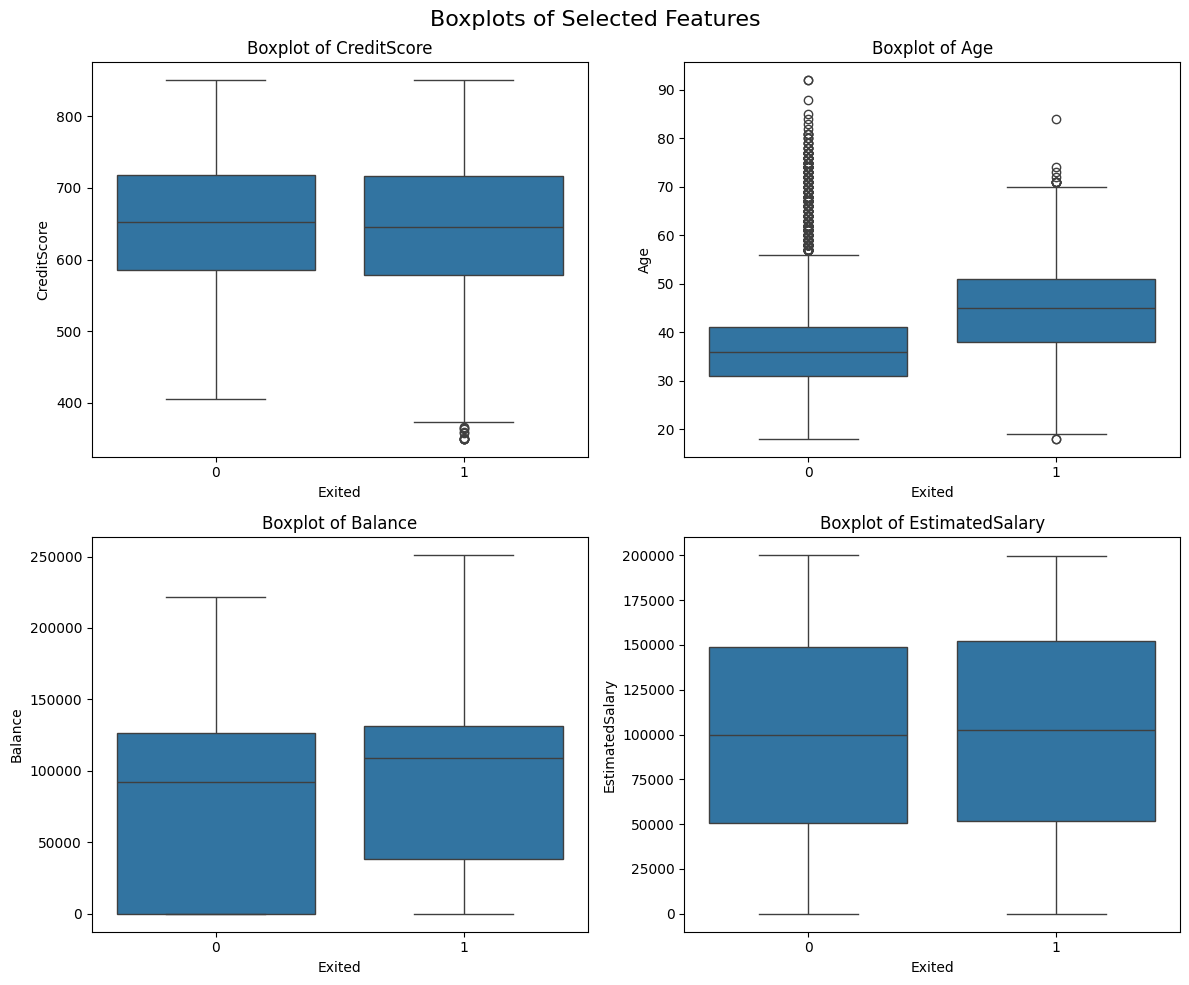

In [10]:

columns_to_plot = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']


fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Boxplots of Selected Features', fontsize=16)

axes = axes.flatten()


for i, column in enumerate(columns_to_plot):
    sns.boxplot(x='Exited', y=column, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel('Exited')
    axes[i].set_ylabel(column)


plt.tight_layout()
plt.show()

In [11]:
def remove_outliers(df):
  l1=df['Age'].quantile(0.05)
  l2=df['Age'].quantile(0.95)
  x=df[(df['Age']>l1) & (df['Age']<l2)]
  return x
df2=remove_outliers(df)


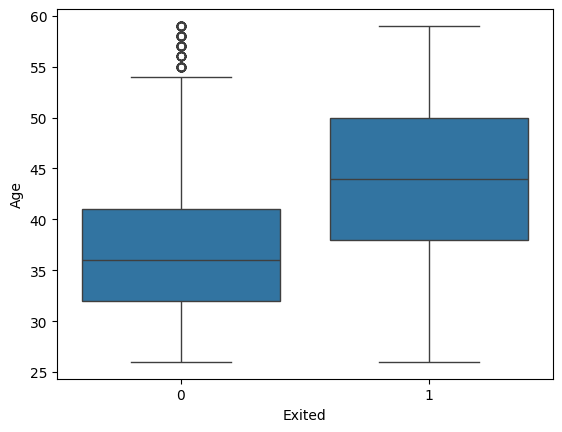

In [12]:
sns.boxplot(x='Exited',y='Age',data=df2)
plt.show()

In [13]:
def remove_outliers(df):
  l1=df['CreditScore'].quantile(0.05)
  l2=df['CreditScore'].quantile(0.95)
  x=df[(df['CreditScore']>l1) & (df['CreditScore']<l2)]
  return x
df2=remove_outliers(df)


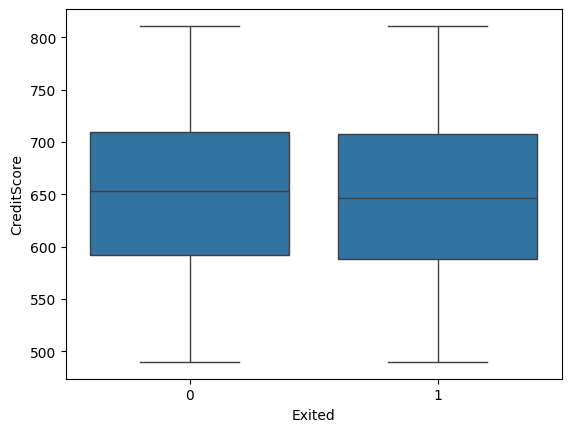

In [14]:
sns.boxplot(x='Exited',y='CreditScore',data=df2)
plt.show()

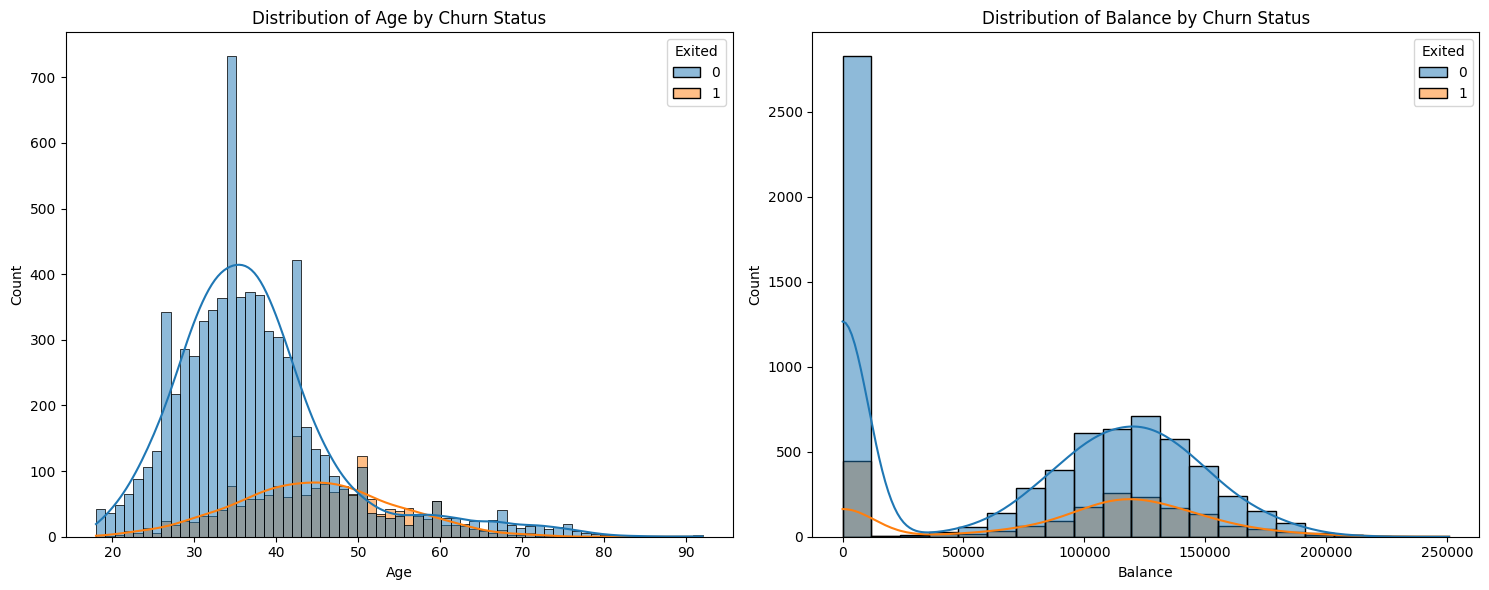

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(data=df2, x='Age', hue='Exited', kde=True, ax=ax1)
ax1.set_title('Distribution of Age by Churn Status')

sns.histplot(data=df2, x='Balance', hue='Exited', kde=True, ax=ax2)
ax2.set_title('Distribution of Balance by Churn Status')

plt.tight_layout()
plt.show()

In [16]:
def age_group(Age):
    if Age < 30:
        return '18-30'
    elif 30 <= Age < 45:
        return '30-45'
    elif 45 <= Age < 60:
        return '45-60'
    else:
        return '60+'

df2["Age Group"] = df2["Age"].apply(age_group)
df2.head()

<ipython-input-16-e0b548179a72>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Age Group"] = df2["Age"].apply(age_group)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age Group
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,30-45
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,30-45
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,30-45
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,30-45
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,30-45


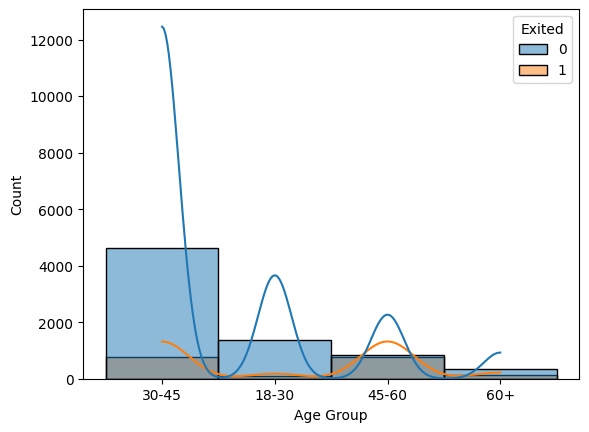

In [17]:
sns.histplot(data=df2, x='Age Group', hue='Exited', kde=True)

plt.show()


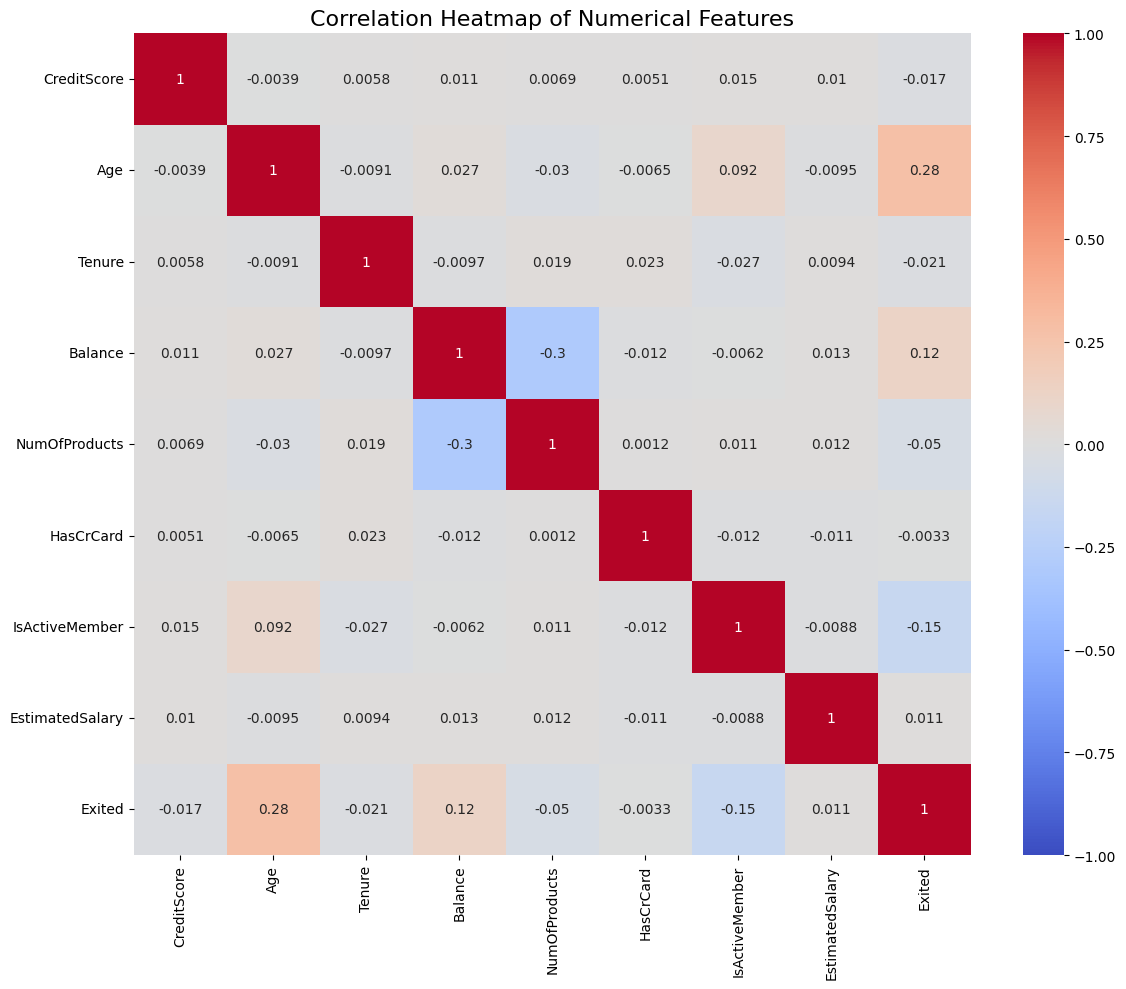

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


numerical_columns = df2.select_dtypes(include=['int64', 'float64']).columns


correlation_matrix = df2[numerical_columns].corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df2['Gender']=le.fit_transform(df2['Gender'])
df3=df2.drop("Age Group",axis=1)
df4=pd.get_dummies(df3,columns=['Geography'])
df4=df4.astype(int)

df4.head()


<ipython-input-19-093419fab2e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Gender']=le.fit_transform(df2['Gender'])


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0,1,1,1,101348,1,1,0,0
1,608,0,41,1,83807,1,0,1,112542,0,0,0,1
2,502,0,42,8,159660,3,1,0,113931,1,1,0,0
3,699,0,39,1,0,2,0,0,93826,0,1,0,0
5,645,1,44,8,113755,2,1,0,149756,1,0,0,1


In [20]:
x=df4.drop(columns=['Exited'],axis=1)
y=df4['Exited']

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
x_train_scaled

array([[-0.32389691, -1.0881304 ,  1.54661115, ..., -0.99239774,
         1.73315297, -0.58359208],
       [-0.96097485,  0.9190075 , -0.27079344, ...,  1.0076605 ,
        -0.57698311, -0.58359208],
       [-0.47679561, -1.0881304 , -1.80123941, ..., -0.99239774,
         1.73315297, -0.58359208],
       ...,
       [-1.66176058, -1.0881304 ,  0.59008242, ..., -0.99239774,
         1.73315297, -0.58359208],
       [ 1.53637068, -1.0881304 ,  2.69444563, ..., -0.99239774,
        -0.57698311,  1.71352567],
       [-0.76985147, -1.0881304 ,  1.16399966, ..., -0.99239774,
        -0.57698311,  1.71352567]])

In [22]:
model=LogisticRegression()
model.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)
print(accuracy_score(y_test,y_pred))


0.8068223952539859


In [23]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,x_train_scaled,y_train,cv=5)
print(scores)


[0.81558029 0.81081081 0.81955485 0.8163752  0.81240064]


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
def find_best_score(x,y):
  algos={"logistic":{"model":LogisticRegression(),
                     "params":{"solver":["liblinear"]}},
         "decision_tree":{"model":DecisionTreeClassifier(),
                          "params":{"criterion":["gini","entropy"]}},
         "random_forest":{"model":RandomForestClassifier(),
         "params":{"criterion":["gini","entropy"]}}}
  scores=[]
  cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
  for algos_name,config in algos.items():
    gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
    gs.fit(x,y)
    scores.append({
          'model':algos_name,
          'best_score':gs.best_score_,
          'best_params':gs.best_params_
      })
  return pd.DataFrame(scores,columns=['model','best_score','best_params'])
find_best_score(x,y)



,model,best_score,best_params
0,logistic,0.795328,{'solver': 'liblinear'}
1,decision_tree,0.798109,{'criterion': 'entropy'}
2,random_forest,0.866073,{'criterion': 'gini'}


In [25]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2156
           1       0.55      0.19      0.28       541

    accuracy                           0.81      2697
   macro avg       0.69      0.58      0.59      2697
weighted avg       0.77      0.81      0.77      2697

[[2073   83]
 [ 438  103]]


In [26]:
model1=RandomForestClassifier()
model1.fit(x_train_scaled,y_train)
y_pred1=model1.predict(x_test_scaled)

In [27]:
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      2156
           1       0.76      0.41      0.53       541

    accuracy                           0.86      2697
   macro avg       0.81      0.69      0.72      2697
weighted avg       0.85      0.86      0.84      2697

[[2086   70]
 [ 319  222]]


In [28]:
rf = RandomForestClassifier(random_state=42)
gs=GridSearchCV(rf,{"criterion":["gini","entropy"]},cv=5)
gs.fit(x_train_scaled,y_train)
best_rf = gs.best_estimator_
y_pred = best_rf.predict(x_test_scaled)

    Importance            Feature
0     0.233436                Age
1     0.146319    EstimatedSalary
2     0.144140            Balance
3     0.137573        CreditScore
4     0.128460      NumOfProducts
5     0.082230             Tenure
6     0.043466     IsActiveMember
7     0.022600  Geography_Germany
8     0.020617             Gender
9     0.018919          HasCrCard
10    0.011550   Geography_France
11    0.010691    Geography_Spain


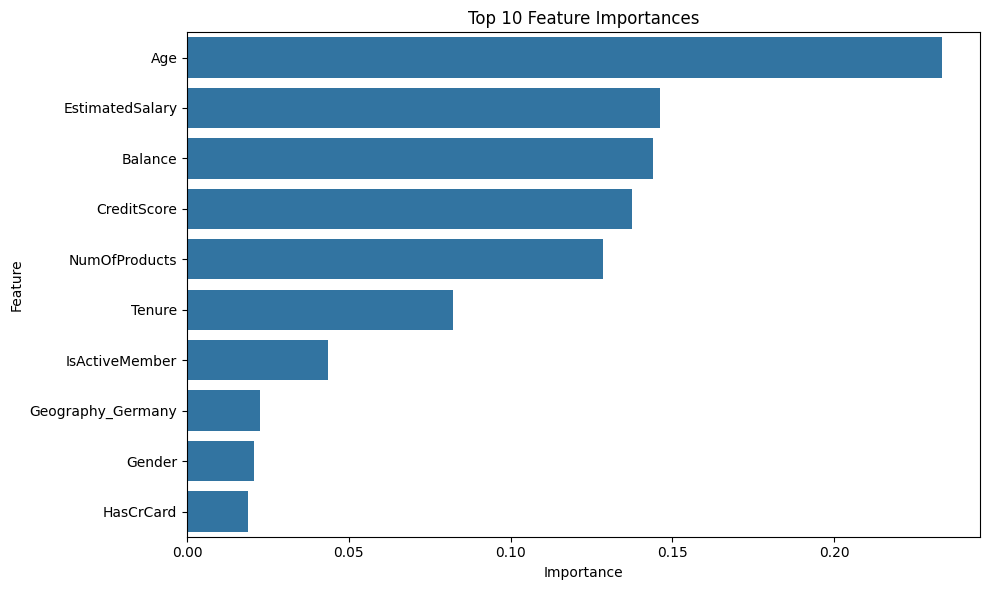

In [29]:
importances = best_rf.feature_importances_
feature_imp = pd.DataFrame(sorted(zip(importances, x.columns), reverse=True), columns=['Importance', 'Feature'])
print(feature_imp)


import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp.head(10))
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()